참고문헌

- 파이썬 딥러닝 파이토치 (이경택, 방심수, 안상준 지음), 정보문화사

- https://gaussian37.github.io/dl-pytorch-snippets/

- 2023 KAIA 한국인공지능학회 / Introduction to pytorch (Hyunchul Kim) / 링크 : https://www.youtube.com/watch?v=YX-AgT-Kovg

- PyTorch로 시작하는 딥 러닝 입문 (유원준, 안상준 지음), 링크 : https://wikidocs.net/book/2788

# 5. Neural network (인공신경망)


## 1) 퍼셉트론 (Perceptron)


- 퍼셉트론(Perceptron)은 프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 제안한 초기 형태의 인공 신경망으로, feedforward network 모형의 가장 간단한 형태인 선형 분류 (Linear Classifier) 모형.

<img src='https://drive.google.com/uc?export=download&id=1Te9x3efTJnL1FUHvDM7tev2kD6FzeaDj' width="" height ="" /><br>

- 퍼셉트론은 처음에 weight를 랜덤하게 설정하고 모델의 오류를 점차 개선해나가며 Weight를 개선해나감.

- 아래와 같은 학습 규칙에 의해 weight가 업데이트됨. 모든 데이터를 올바르게 분류할때까지 이 과정을 거침.

$$ W_i \leftarrow W_i + \Delta W_i $$
where $\Delta W_i = \eta (t-o)x_i,\ t = \text{실제 값},\ o=\text{예측 값}$

### 1-1) 퍼셉트론의 한계

- 페섭트론은 선형 분류 모형의 형태를 가지고 있기 때문에 선형 문제 밖에 풀지 못함 (why?)
- 비선형 분류 문제는 풀지 못한다라는 단점이 있음.

<img src='https://drive.google.com/uc?export=download&id=1HaWOVe3h3WKoP4rV6CmoK046qncbFUda' width="" height ="" /><br>


## 2) 다층 퍼셉트론 (Multi Layer Perceptron, MLP)

- 퍼셉트론이 가지는 한계점을 극복하기 위해 여러 Layer를 쌓아 올린 MLP가 등장하게 되었음

<img src='https://drive.google.com/uc?export=download&id=1K4yrj8YBPAd8vbcbrID5WUwP-Q0YG5qN' width="" height ="" /><br>

- 여러 개의 퍼셉트론의 조합과 그것들의 재조합으로 복잡한 비선형적인 모형을 만들어내는 것.

- 딥러닝의 기본 구조가 되는 신경망이라고 한다면 기본적으로 MLP를 의미. MLP의 hidden layer를 쌓으면 Layer가 깊어지기 (Deep) 때문에 딥러닝이라고 칭하게 됨. 딥러닝의 가장 기본적인 모형에 해당됨.

- 이와 대비되는 차원에서 이전에 본 퍼셉트론을 다른 말로 단층 퍼셉트론 (Single layer perceptron)이라고도 함.

- 위 그림은 Input, Hidden, output 총 세개의 layer로 연결되어 있는 MLP이며, 각 원 하나는 노드 (Node)라고 부름.

- Input node의 수는 Input data의 변수의 수가 되며, Hideden layer와 hidden node의 수는 사용자가 지정해 주어야 함. Hyperparameter에 해당
- Output layer는 최종적으로 모델의 결과 값을 의미하기 때문에, Output node의 수는 풀고자 하는 문제에 따라 달라짐.
  + 예를 들어, 회귀분석의 경우 Output node의 수는 1이 되고, 0부터 9까지의 숫자 분류를 하고자 하는 경우는 Output node의 수가 10이 됨.

### 2-1) MLP 학습 방법

- Feed Forward
  + 신경망의 input에서 weight와 hidden을 거쳐 Output을 내보내는 과정
- Back propagation
  + Feed Forward를 통해서 Input에서 Output까지 계산하며 Weight를 업데이트 하는 과정.

<img src='https://drive.google.com/uc?export=download&id=1TqSScyTlSlHAzb3_4tCfrXONxlsYtHwh' width="" height ="" /><br>

## 3. Toy example - XOR 게이트

<img src='https://drive.google.com/uc?export=download&id=13jYe0IfgAp4flWRuEwpsoZDMWMh_Z0NI' width="" height ="" /><br>

__코드 구현 1 : 단층 퍼셉트론__

In [ ]:
# 필요한 도구 임포트
import torch
import torch.nn as nn

In [ ]:
# GPU 연산이 가능할 경우에는 GPU 연산을 할 수 있도록 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

- XOR 문제에 해당되는 입력과 출력을 정의

In [ ]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

- 1개의 뉴런을 가지는 단층 퍼셉트론을 구현해봅시다.
- 단층 퍼셉트론이 처음 소개되었을 때는 계단 함수였지만, 우리는 이미 또 다른 활성화 함수인 시그모이드 함수를 알고 있으므로 시그모이드 함수를 사용

In [ ]:
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()

# 모형 선언
model = nn.Sequential(
   linear,
   sigmoid
).to(device)

- 0 또는 1을 예측하는 이진 분류 문제이므로 비용 함수로는 크로스엔트로피 함수를 사용합니다.
- `nn.BCELoss()`는 이진 분류에서 사용하는 크로스엔트로피 함수입니다.

In [ ]:
# 비용 함수와 옵티마이저 정의
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr= 1)

In [ ]:
#10,001번의 에포크 수행. 0번 에포크부터 10,000번 에포크까지.
for step in range(10001):

    # 비용 함수
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)

    # gradient descent
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if step % 100 == 0: # 100번째 에포크마다 비용 출력
        print(step, cost.item())

0 0.7273973822593689
100 0.6931476593017578
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

- 200번 에포크에 비용이 0.6931471824645996가 출력된 이후에는 10,000번 에포크가 되는 순간까지 더 이상 비용이 줄어들지 않습니다.
- 이는 단층 퍼셉트론은 XOR 문제를 풀 수 없기 때문입니다.

- 총 10,001회 학습한 단층 퍼셉트론의 예측값의 경우,

In [ ]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


- 실제값은 0, 1, 1, 0임에도 예측값은 0, 0, 0, 0으로 문제를 풀지 못하는 모습을 보여줍니다.

__코드 구현 2 : 다층 퍼셉트론__

In [ ]:
import torch
import torch.nn as nn

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

- 다층 퍼셉트론을 설계합니다.
  + 아래는 입력층, 은닉층1, 은닉층2, 은닉층3, 출력층을 가지는 은닉층이 3개인 인공 신경망입니다.

In [ ]:
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

- 위 인공 신경망을 그림으로 표현하면 아래와 같습니다.

<img src='https://drive.google.com/uc?export=download&id=1lS4BtK8heZ0Ft68d7h_Q7pkn3gkasuTY' width="" height ="" /><br>

- 이제 비용 함수와 옵타마이저를 선언합니다.

In [ ]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1
## L2 regularization의 경우 weight_decay=?? 추가
## 예를 들어 torch.optim.SGD(model.parameters(), lr=1, weight_decay=0.1)

In [ ]:
for epoch in range(10001):

    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)

    # gradient descent
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.6948983073234558
100 0.693155825138092
200 0.6931535601615906
300 0.6931513547897339
400 0.6931493282318115
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931379437446594
1100 0.6931361556053162
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931197047233582
2000 0.6931172609329224
2100 0.6931145191192627
2200 0.6931115984916687
2300 0.6931084990501404
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930879950523376
2900 0.6930825114250183
3000 0.6930762529373169
3100 0.6930692195892334
3200 0.6930612325668335
3300 0.6930519938468933
3400 0.6930411458015442
3500 0.6930283904075623
3600 0.6930132508277893
3700 0.6929951906204224
3800 0.6929728984832764
3900 0.6929453015327454
4000 0.6929103136062622
4100 0.6928649544715881
4200 

- 이제 모델이 XOR 문제를 풀 수 있는지 테스트 해봅시다.

In [ ]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.1168801e-04]
 [9.9982882e-01]
 [9.9984229e-01]
 [1.8529482e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


- 실제값은 0, 1, 1, 0이며 예측값은 0, 1, 1, 0으로 문제를 해결하는 모습을 보여줍니다.

#### >>>> *(실습)*

- 다음의 데이터에 대해서 binary classification을 수행하는 MLP 모형을 구현하고 test accuracy를 계산하라.
  + 이 때 MLP의 구조는 hidden layer는 두개로 하고, 첫번째 hidden layer는 총 16개의 hidden unit을, 두번째 hidden layer는 총 32개의 hidden unit을 가지도록 구현하라.

- (참고) `scikit-learn` :  머신러닝 알고리즘과 데이터 처리를 위한 Python의 대표적인 라이브러리
  + 작은 데이터셋이나 간단한 문제(선형 분류, 클러스터링 등)에서 데이터를 빠르게 전처리하거나 다양한 알고리즘을 테스트하는 데 `scikit-learn`은 매우 효율적임.

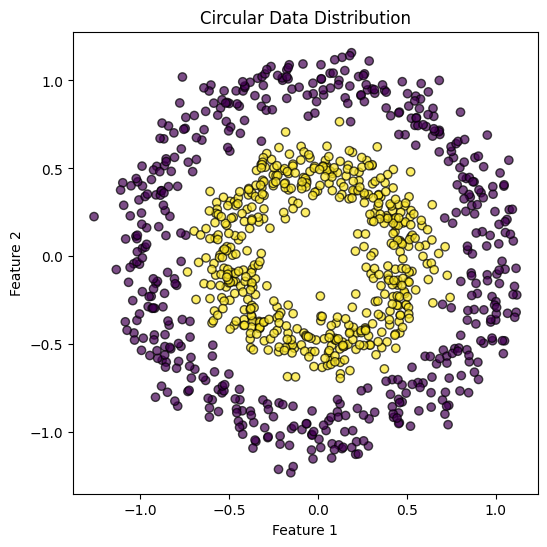

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# 1. 데이터 생성 (원형 데이터)
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1, random_state=42)  # factor=0.5로 두 원의 크기 차 조정
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 시각화
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap="viridis", edgecolor="k", alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Circular Data Distribution")
plt.show()

In [4]:
model = nn.Sequential(
    nn.Linear(2,16),
    nn.Sigmoid(),
    nn.Linear(16,32),
    nn.Sigmoid(),
    nn.Linear(32,1),
    nn.Sigmoid()
    ).to(device)

Epoch 20/200, Loss: 0.5011357069015503
Epoch 40/200, Loss: 0.13942204415798187
Epoch 60/200, Loss: 0.03432850539684296
Epoch 80/200, Loss: 0.018847502768039703
Epoch 100/200, Loss: 0.014091309159994125
Epoch 120/200, Loss: 0.011583524756133556
Epoch 140/200, Loss: 0.009886933490633965
Epoch 160/200, Loss: 0.008223130367696285
Epoch 180/200, Loss: 0.007055907044559717
Epoch 200/200, Loss: 0.0061818999238312244


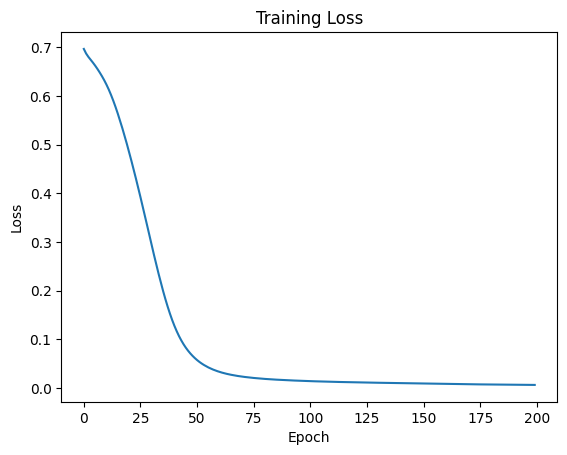

Test Accuracy: 97.00%


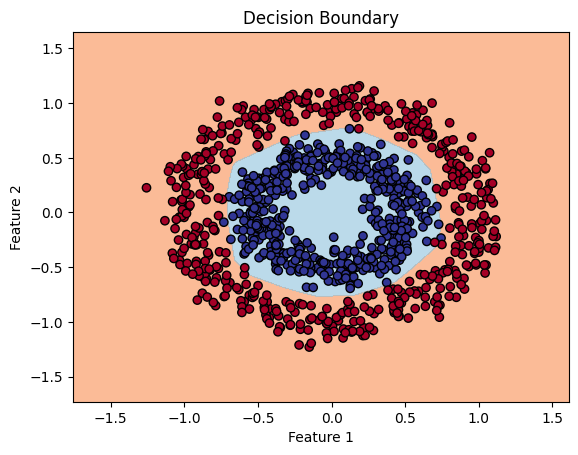

In [5]:
# -------------------------------------------------------------------------------------------------------------
# 2. 모델 정의 (MLP)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 16)   # 입력층(2) -> 은닉층(16)
        self.fc2 = nn.Linear(16, 32)  # 은닉층(16) -> 은닉층(32)
        self.fc3 = nn.Linear(32, 1)   # 은닉층(32) -> 출력층(1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)  # 로짓 값 반환
        return x

# 3. 모델 초기화
model = MLP()

# 4. 손실 함수 및 옵티마이저 설정
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 5. 학습
epochs = 200
losses = []

for epoch in range(epochs):
    model.train()

    logits = model(X_train)  # 모델의 예측값 (로짓)
    loss = criterion(logits, y_train)  # 손실 계산

    optimizer.zero_grad()
    loss.backward()  # 기울기 계산
    optimizer.step()  # 가중치 업데이트

    losses.append(loss.item())
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

# 6. 학습 손실 시각화
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

# 7. 테스트 결과 확인
model.eval()
with torch.no_grad():
    logits = model(X_test)
    predictions = torch.sigmoid(logits)  # Sigmoid로 확률 변환
    predicted_classes = (predictions > 0.5).float()  # 0.5 기준으로 클래스 분류
    accuracy = (predicted_classes == y_test).float().mean()
    print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")

# 8. 데이터 시각화 (결과 확인)
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    with torch.no_grad():
        logits = model(grid_tensor)
        probs = torch.sigmoid(logits).numpy().reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.6, cmap="RdYlBu")
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor="k", cmap="RdYlBu")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# 결과 시각화
plot_decision_boundary(model, X.numpy(), y.numpy())
# -------------------------------------------------------------------------------------------------------------

In [ ]:
prediction.shape

- (참고) `model.train()`과 `model.eval()`은 PyTorch 모델이 학습 모드와 평가 모드를 명시적으로 전환하도록 설계된 메서드
  + Dropout이나 Batch Normalization같은 layer의 경우 학습과 평가에서 다르게 작동하기 때문.

## 4. 사람의 손글씨 데이터인 MNIST 데이터를 활용한 분류 실습

- 은닉층을 추가로 넣어 다층 퍼셉트론을 구현하고, 딥 러닝을 통해서 MNIST 데이터를 분류해봅시다.

### 4-1) 데이터 로드하기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# 브라우저 안에서 그림창 뜨게하려고
%matplotlib inline
from sklearn.datasets import fetch_openml

In [ ]:
# MNIST 데이터셋을 불러오기
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

In [ ]:
# 첫번째 샘플 - X
mnist.data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
# 첫번째 샘플 - y
mnist.target[0]

'5'

In [ ]:
# 레이블 데이터 타입을 정수형으로 변환
mnist.target = mnist.target.astype(np.int8)
mnist.target[0]

np.int8(5)

- 모든 이미지 데이터를 0-255 범위에서 0-1 범위로 정규화합니다. 이는 학습 효율을 높이기 위해 수행합니다. 레이블 데이터를 y에 저장합니다.

In [ ]:
X = mnist.data / 255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

In [ ]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
y[0]

np.int8(5)

- 첫 번째 MNIST 데이터 샘플을 시각화하고 해당 이미지의 레이블을 출력합니다.

이 이미지 데이터의 레이블은 5이다


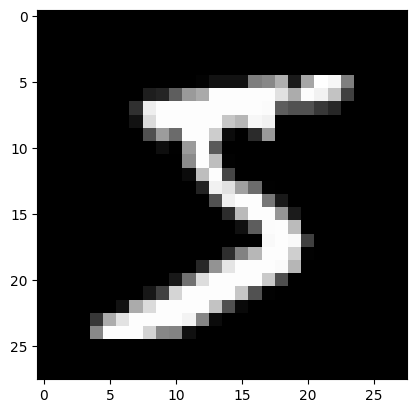

In [ ]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

### 5-2) 훈련 데이터와 테스트 데이터의 분리

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

- MNIST 데이터셋을 불러오고, 이를 훈련 세트와 테스트 세트로 분할합니다.
- 데이터를 PyTorch의 텐서로 변환 후, TensorDataset을 사용하여 데이터셋을 구성합니다.
- 이 데이터셋을 DataLoader에 적용하여 미니 배치 학습이나 추론 시 편리하게 데이터를 로드할 수 있게 합니다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0) # 퀴즈볼 때 참고

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train) # 정수 인코딩이기 때문에 LongTensor
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False) # test는 셔플 필요없음.

### 5-3) 다층 퍼셉트론

In [ ]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
from torch import optim

# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.01) # SGD / Adam(퀴즈 시 default로 쓰기)

In [ ]:
def train(epoch):
    model.train()  # 신경망을 학습 모드로 전환

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:

        optimizer.zero_grad()  # 경사를 0으로 초기화
        outputs = model(data)  # 데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets)  # 출력과 훈련 데이터 정답 간의 오차를 계산
        loss.backward()  # 오차를 역전파 계산
        optimizer.step()  # 역전파 계산한 값으로 가중치를 수정

    print("epoch{}：완료\n".format(epoch))

In [ ]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [ ]:
# 학습 이전
test()


테스트 데이터에서 예측 정확도: 662/10000 (7%)



In [ ]:
# 학습 이후 (미니배치 시 for문 두개 쓰는 거 보다, 에폭단위 실행함수 구현 -> 에폭 지정 후 for문 돌리기)
for epoch in range(3):
    train(epoch)

# 테스트 성능
test()

epoch0：완료

epoch1：완료

epoch2：완료


테스트 데이터에서 예측 정확도: 9542/10000 (95%)



예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


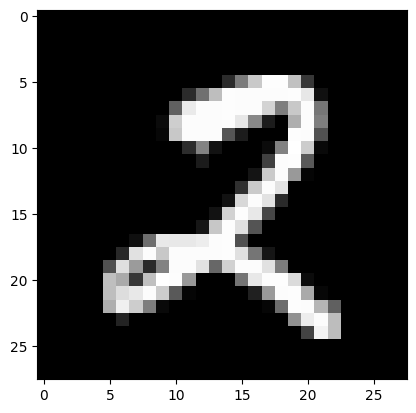

In [ ]:
index = 2018

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 0)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))